<a href="https://colab.research.google.com/github/jtndr26/Bike-Sharing-Demand-/blob/main/ML_Capstone_II_LogTrans_capped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Bike Sharing Demand Prediction
## Contributor: Individual</br>
## Team member: Jeetendra Sarpe.

## Business Context:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accesible to the public at the right time as it lessens the waiting time.

## Problem Description:
Providing the city with the stable supply of rental bikes becomes a major concern. The crucial part is the prediction of the bike count required at each hour for the stable supply of the Rental bikes.

## Objective:
Make a prediction using Linear Regression technique on the count of the Rental bikes, so as to maintain the stable supply of bikes.

### 1. Reading and Understanding the data.

In [ ]:
# Mounting Google drive to access dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required Libraries.
import numpy as np, pandas as pd
from numpy import math
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [ ]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Capstone_II/SeoulBikeData.csv',encoding = 'ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Changing Date column from object to datetime format
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Rented Bike Count** is our Target/Dependent variable. Our task is to make predictions on this feature.

The dataset looks clean and doesn't have any missing values, the formats of the variables are also good.

### 2. Exploratory Data Analysis

In [ ]:
# Clubbing numerical datatypes variables
num_cols = df.select_dtypes(include = ['int','float']).columns
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
# Clubbing categorical datatypes variables
cat_cols = df.select_dtypes(include = ['object']).columns
cat_cols

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

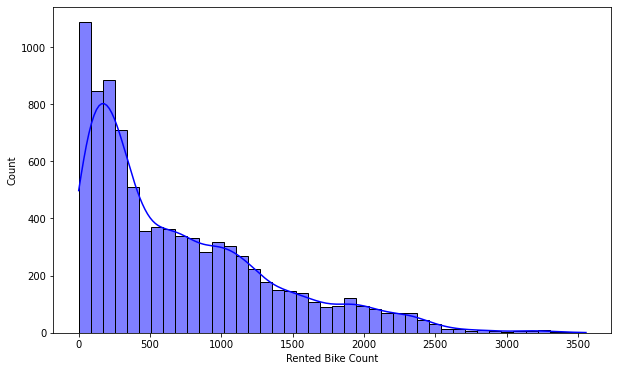

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df['Rented Bike Count'],kde = True,color = 'b')
plt.show()

The distribution of the target variable is highly skewed(Right Skewed). This generally look because of positive outliers. To deal with this skewness we've to perform log transformation on the target variable.  

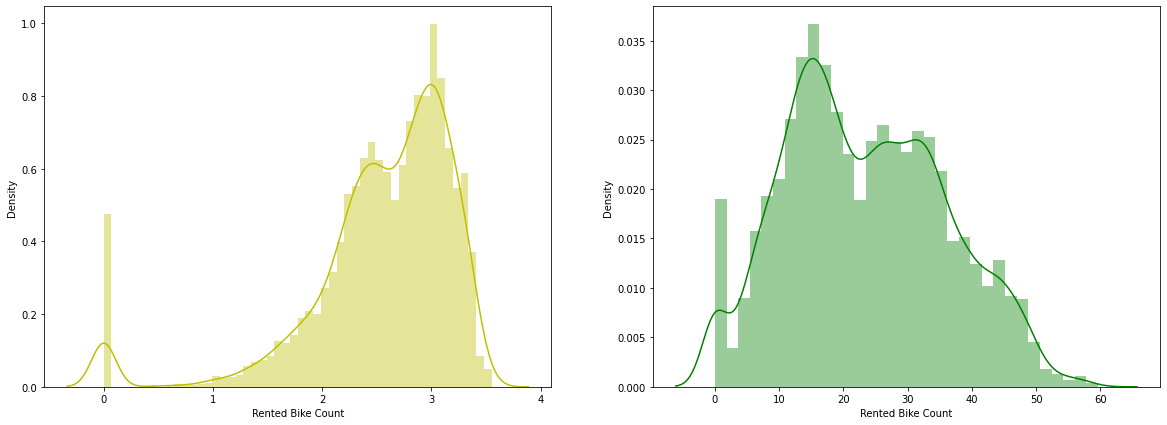

In [ ]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.distplot(np.log10(df['Rented Bike Count']+1),color = 'y')
plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count']),color = 'g')
plt.show()

Since the Target variable contains counts as 0 also, the log transformation shows a spike at 0 count and a couple at the middle. So we also looked for a Square root transformation, although the spikes in the square root transformation are somewhere popping but they are almost near the centre region.

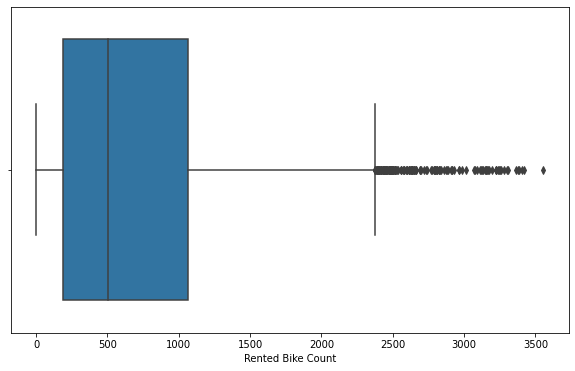

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(df['Rented Bike Count'])
plt.show()

In [ ]:
df1 = df.copy()
percentile = df1['Rented Bike Count'].quantile([0.05,0.95]).values
df1['Rented Bike Count'] = np.clip(df1['Rented Bike Count'],percentile[0],percentile[1])

In [ ]:
percentile[0],percentile[1]

(22.0, 2043.0)

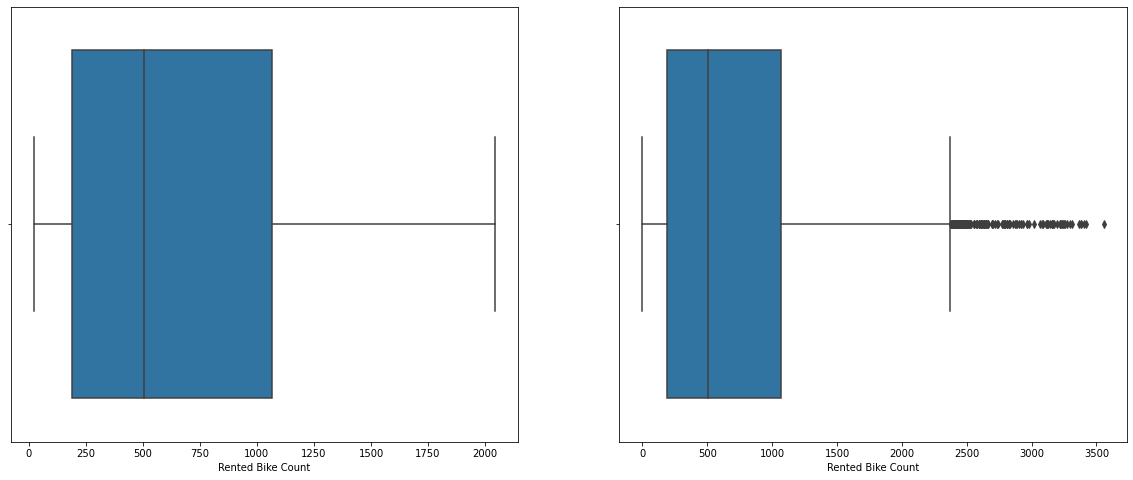

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(df1['Rented Bike Count'])
plt.subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.show()

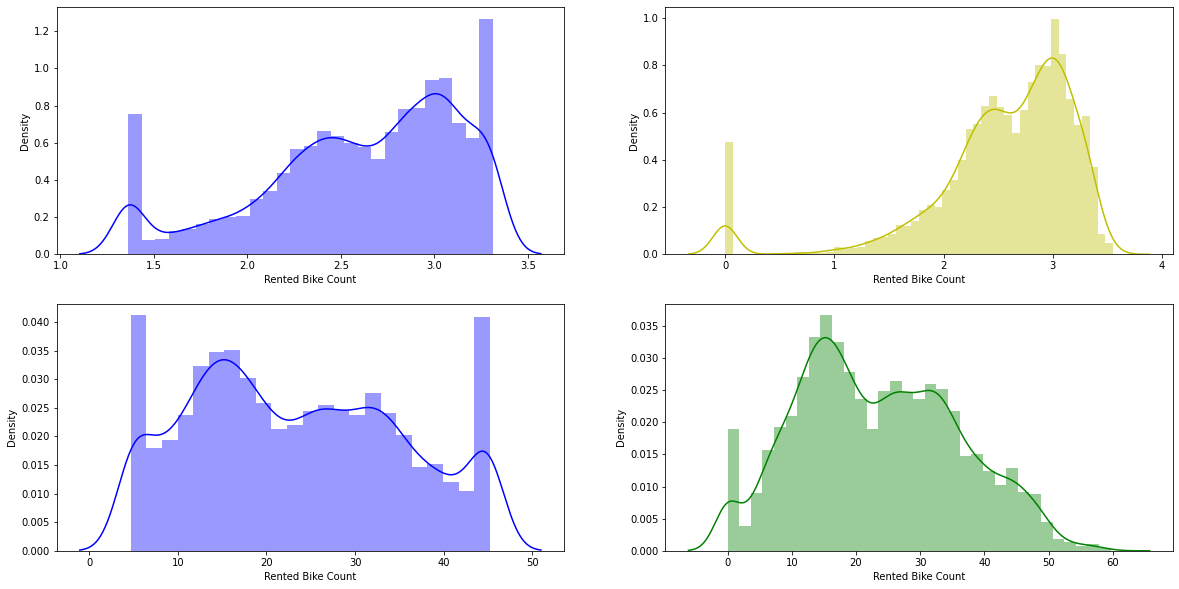

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(np.log10(df1['Rented Bike Count']+1),color = 'b')
plt.subplot(2,2,2)
sns.distplot(np.log10(df['Rented Bike Count']+1),color = 'y')
plt.subplot(2,2,3)
sns.distplot(np.sqrt(df1['Rented Bike Count']),color = 'b')
plt.subplot(2,2,4)
sns.distplot(np.sqrt(df['Rented Bike Count']),color = 'g')
plt.show()

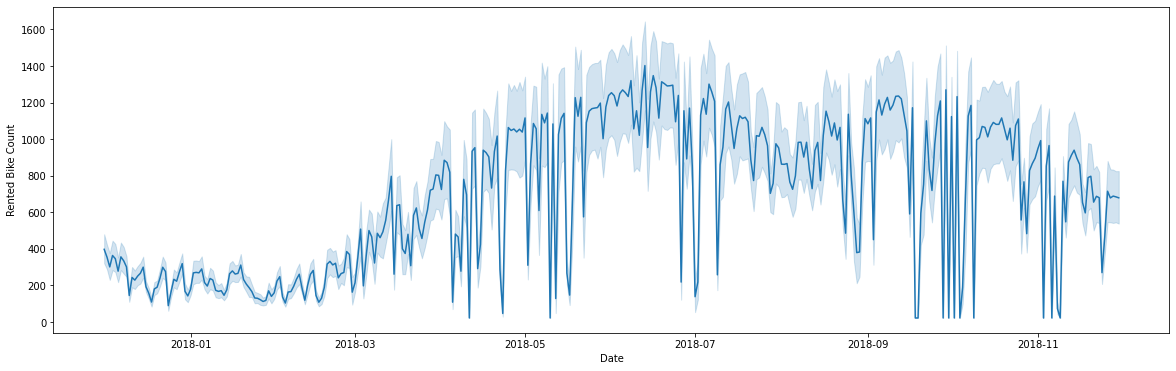

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(df1['Date'],df1['Rented Bike Count'])
plt.show()

## Univariate Analysis

In [ ]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
len(num_cols)

10

In [ ]:
df = df1.copy()

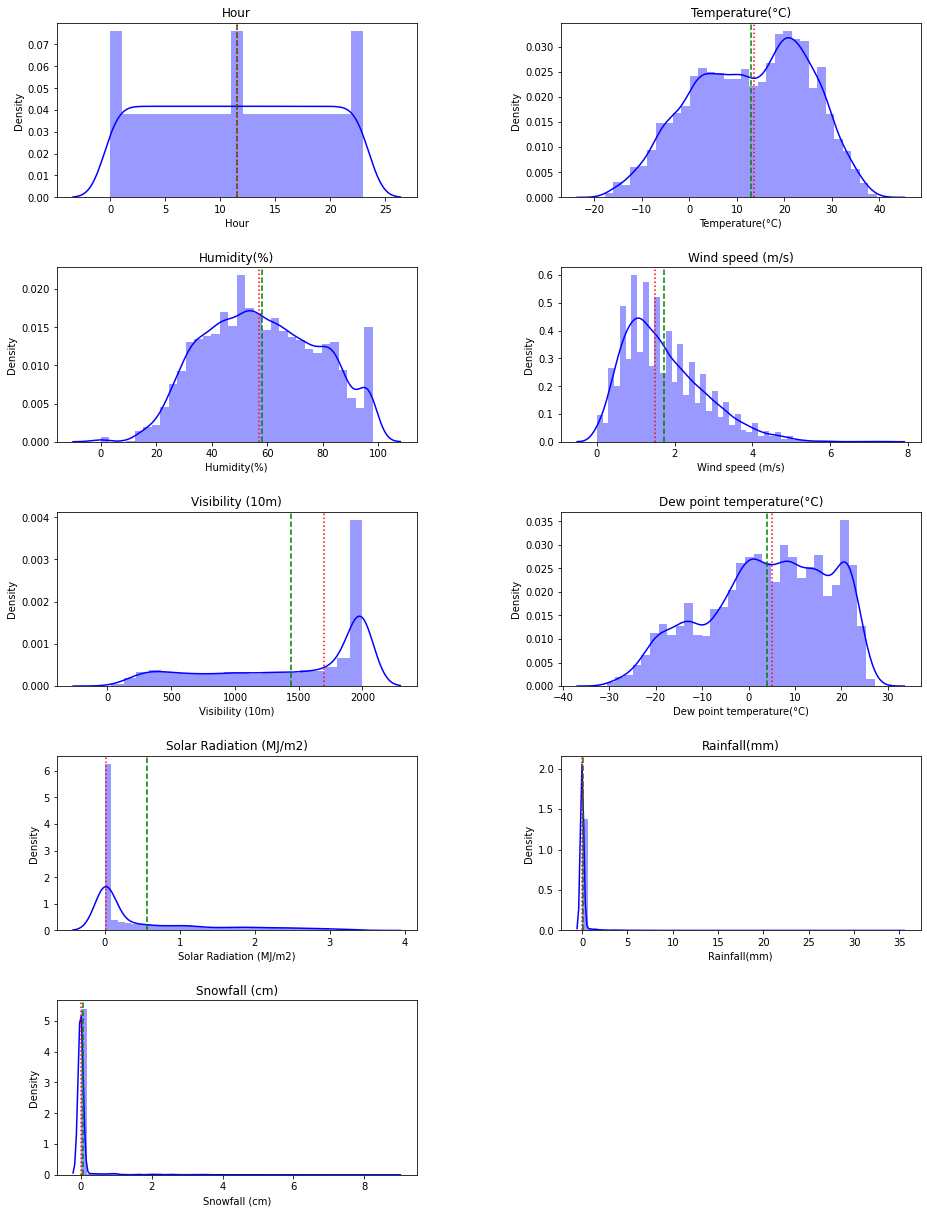

In [ ]:
plt.figure(figsize = (15,20))
for i in range(1,len(num_cols)):
  plt.subplot(5,2,i)
  sns.distplot(df[num_cols[i]],color = 'b')
  plt.axvline(df[num_cols[i]].mean(),color = 'g',linestyle = 'dashed')
  plt.axvline(df[num_cols[i]].median(),color = 'r',linestyle = 'dotted')
  plt.title(num_cols[i])
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()


In [ ]:
cat_cols

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
df[cat_cols].head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [ ]:
for i in cat_cols:
  print(df[i].value_counts())
  print('\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


Yes    8465
No      295
Name: Functioning Day, dtype: int64




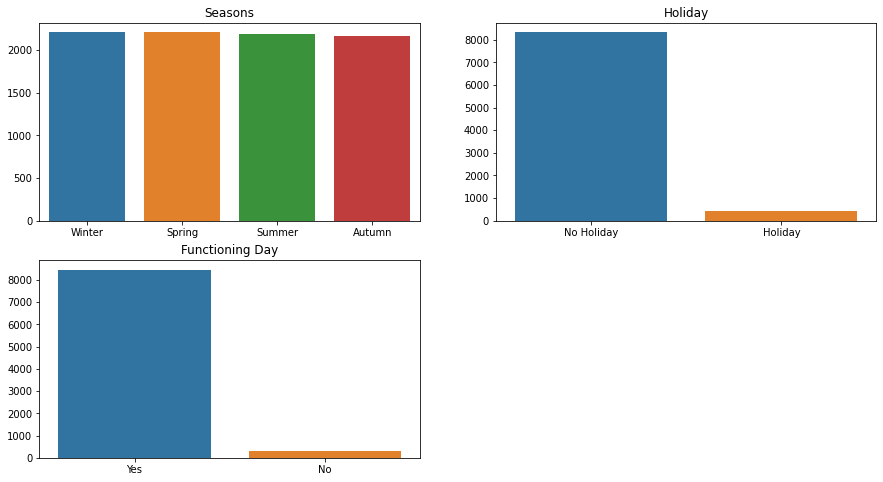

In [ ]:
plt.figure(figsize = (15,8))
for i in range(0,len(cat_cols)):
  plt.subplot(2,2,i+1)
  sns.barplot(df[cat_cols[i]].unique(),df[cat_cols[i]].value_counts().values)
  plt.title(cat_cols[i])
plt.show()

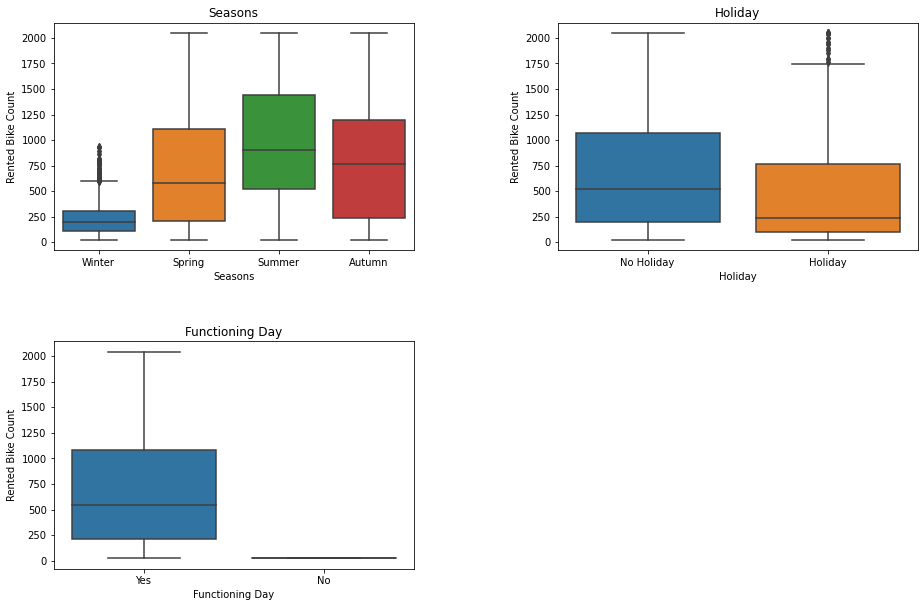

In [ ]:
plt.figure(figsize = (15,15))
for i in range(len(cat_cols)):
  plt.subplot(3,2,i+1)
  sns.boxplot(df[cat_cols[i]],df['Rented Bike Count'])
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
  plt.title(cat_cols[i])
plt.show()

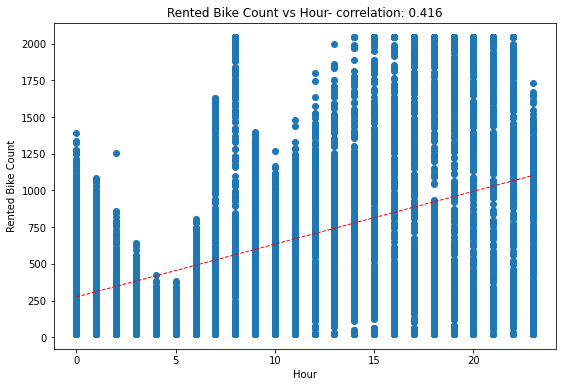

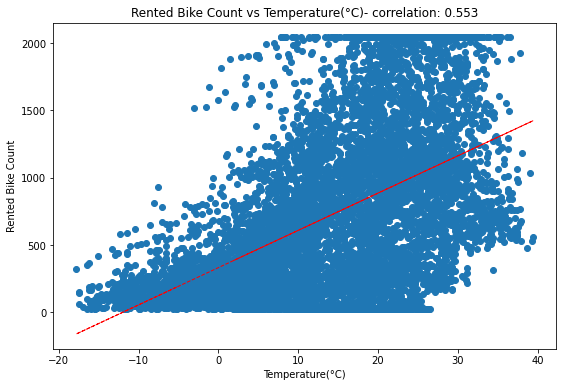

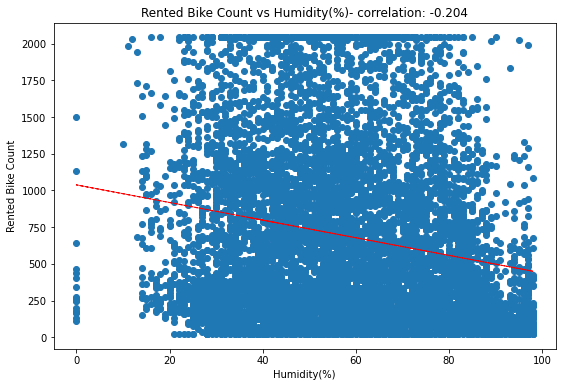

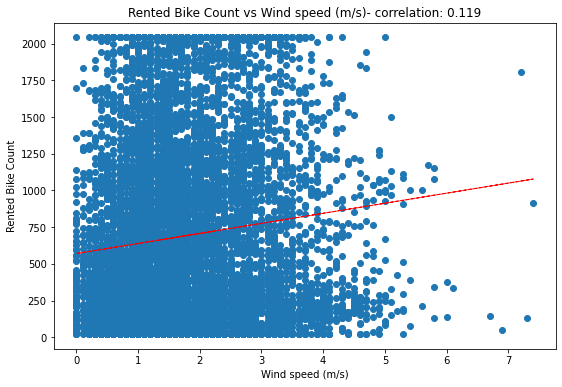

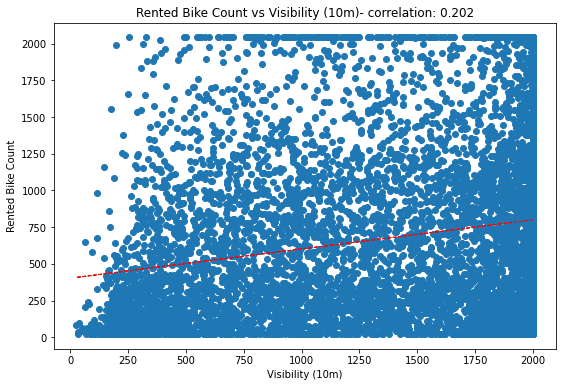

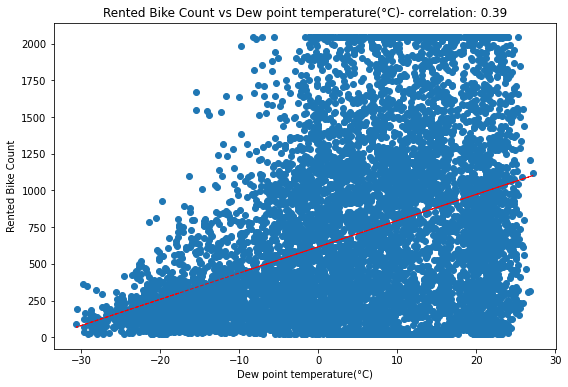

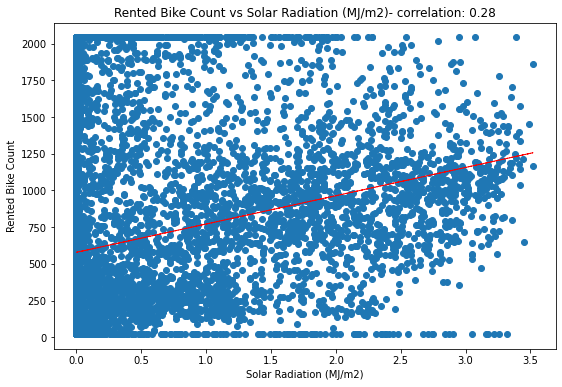

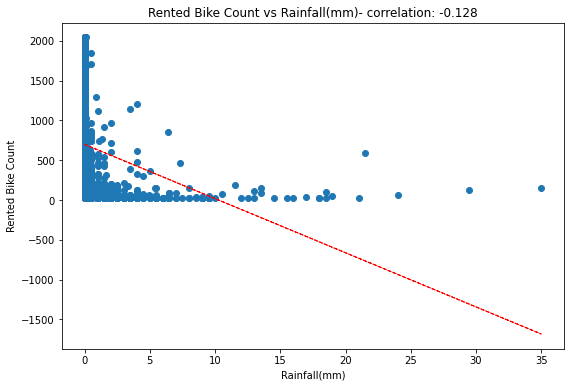

In [ ]:
for col in num_cols[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(round(correlation,3)))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

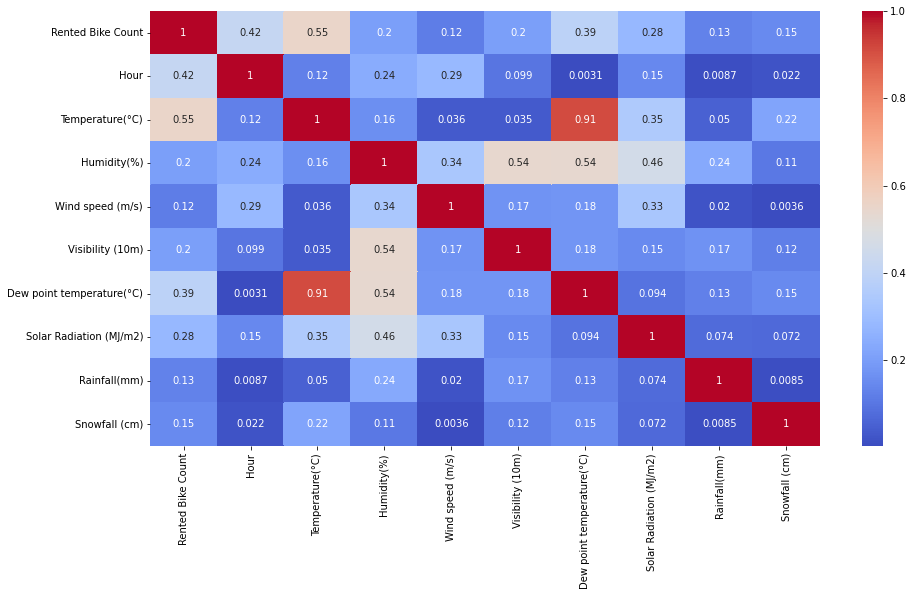

In [ ]:
plt.figure(figsize = (15,8))
correlation = df.corr()
sns.heatmap(abs(correlation),annot = True,cmap = 'coolwarm')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in  range(X.shape[1])]
  vif.sort_values(by = 'VIF',ascending = False,inplace = True)
  return(vif)

In [ ]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
calc_vif(df[[i for i in num_cols if i not in ['Rented Bike Count','Temperature(°C)','Humidity(%)']]])

,variables,VIF
1,Wind speed (m/s),4.294676
2,Visibility (10m),3.858300
0,Hour,3.692068
4,Solar Radiation (MJ/m2),1.681888
3,Dew point temperature(°C),1.147759
5,Rainfall(mm),1.049933
6,Snowfall (cm),1.043130


In [ ]:
cat_cols

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
for i in cat_cols:
  print(df[i].value_counts())
  print('\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


Yes    8465
No      295
Name: Functioning Day, dtype: int64




In [ ]:
# labels = {'Seasons':{'Spring':0,'Summer':1,'Autumn':3,'Winter':4},'Holiday':{'No Holiday':0,'Holiday':1},'Functioning Day':{'Yes':1,'No':0}}
df_pr = df.copy()
df_pr = df_pr.replace({'Holiday':{'No Holiday':0,'Holiday':1}})
df_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
1,2017-12-01,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
2,2017-12-01,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes
3,2017-12-01,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
4,2017-12-01,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes


In [ ]:
# One hot encoding
df_pr = pd.get_dummies(df_pr,columns = ['Functioning Day'],prefix = ['func_day'])
Season = pd.get_dummies(df_pr['Seasons'])
# Holiday = pd.get_dummies(df_pr['Holiday'])

df_pr = pd.concat([df_pr,Season],axis = 1)
# df_pr = pd.concat([df_pr,Holiday],axis = 1)

df_pr.drop(['Seasons'],axis = 1,inplace = True)
df_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,func_day_No,func_day_Yes,Autumn,Spring,Summer,Winter
0,2017-12-01,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,1
1,2017-12-01,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,1
2,2017-12-01,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,1
3,2017-12-01,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,1
4,2017-12-01,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,0,0,0,1


In [ ]:
df_pr.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'func_day_No', 'func_day_Yes', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:
feature = [i for i in df_pr.columns if i not in ['Date','Rented Bike Count','Temperature(°C)','Humidity(%)']]
feature

['Hour',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'func_day_No',
 'func_day_Yes',
 'Autumn',
 'Spring',
 'Summer',
 'Winter']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
from scipy.stats import zscore
X = df_pr[feature].apply(zscore)
y = np.log10(df_pr['Rented Bike Count']+1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6132, 14)
(2628, 14)


In [ ]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.6213672466138904

In [ ]:
reg.coef_

array([ 1.58047520e-01, -6.00098376e-03,  7.78417264e-02,  7.50677414e-02,
        9.08074469e-02, -1.13391715e-01, -2.93725005e-02, -2.92794206e-02,
        9.13848566e+12,  9.13848566e+12,  4.20454656e+12,  4.21986372e+12,
        4.21986372e+12,  4.18900415e+12])

In [ ]:
reg.intercept_

2.605726176569086

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([2.54615586, 2.69947618, 2.33717149, ..., 2.40064805, 2.23072618,
       2.67262071])

In [ ]:
MSE = mean_squared_error(10**y_test,10**y_pred)
print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))

MSE: 181042.20465710928
RMSE: 425.4905459080252


In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4857186666342981
Adjusted R2 :  0.48296323660478413


In [ ]:
metric1 = []
metric1.append(MSE)
metric1.append(MSE**0.5)
metric1.append(r2)
metric1.append(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

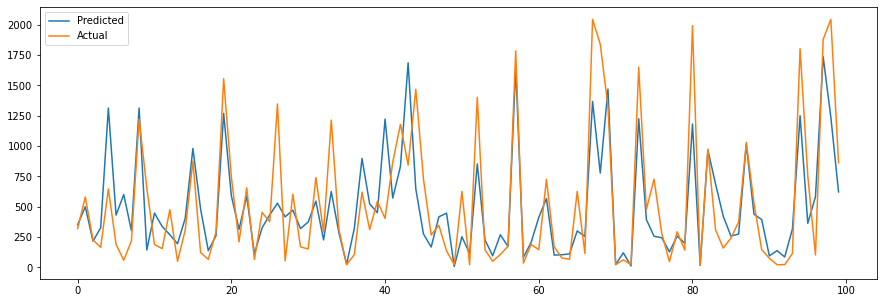

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(10**(y_pred[:100]))
plt.plot(np.array(10**(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1,max_iter = 3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train,y_train)

0.41182343400741994

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE = mean_squared_error(10**y_test,10**y_pred_l)
print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 303799.0366926477
RMSE: 551.1796773218764
R2 : 0.1370068986873917
Adjusted R2 :  0.1323831315927202


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameter = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0011]}
lasso_regressor = GridSearchCV(lasso,parameter,scoring = 'neg_mean_squared_error',cv = 5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0011]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.10702806594658354


In [ ]:
lassocv = Lasso(alpha = 0.0001)
lassocv.fit(X_train,y_train)
lassocv.score(X_train,y_train)

0.6215584035072497

In [ ]:
y_pred_lasso = lassocv.predict(X_test)

In [ ]:
metric2 = []
metric2.append(MSE)
metric2.append(MSE**0.5)
metric2.append(r2)
metric2.append(1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

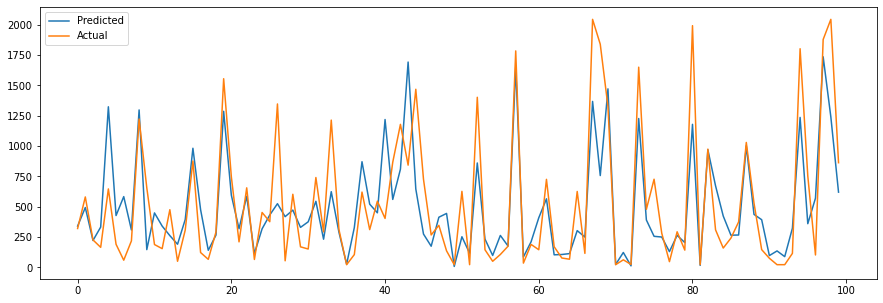

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(10**(y_pred_lasso[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE = mean_squared_error(10**y_test,10**y_pred_lasso)
print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 182680.02786656187
RMSE: 427.41084200867186
R2 : 0.4810661498050324
Adjusted R2 :  0.4782857923987065


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,25]}
ridge_regressor = GridSearchCV(ridge,parameter,scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0011]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 50}

Using  {'alpha': 50}  the negative mean squared error is:  -0.10701872608001226


In [ ]:
ridge_regressor.score(X_train,y_train)

-0.10636635627765927

In [ ]:
ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.6215391487892583

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 183201.29373866747
RMSE : 428.0202024889333
R2 : 0.47958540497952473
Adjusted R2 :  0.47679711399969815


In [ ]:
metric3 = []
metric3.append(MSE)
metric3.append(MSE**0.5)
metric3.append(r2)
metric3.append(1-(1-r2_score((y_test**2), (y_pred_ridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

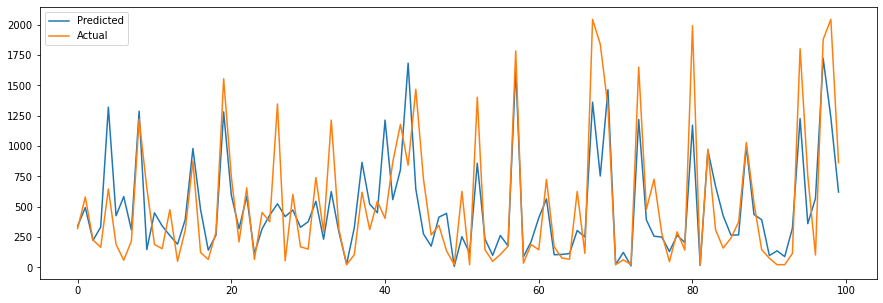

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(10**(y_pred_ridge[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.011],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.011],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.10702664051992641


In [ ]:
elastic = ElasticNet(alpha = 0.001,l1_ratio = 0.3)
elastic.fit(X_train,y_train)
elastic.score(X_train,y_train)

0.6215541797000617

In [ ]:
y_pred_elastic = elastic.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 182743.3036306987
RMSE : 427.4848577794291
R2 : 0.48088640417935535
Adjusted R2 :  0.4781050837271973


In [ ]:
metric4 = []
metric4.append(MSE)
metric4.append(MSE**0.5)
metric4.append(r2)
metric4.append(1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

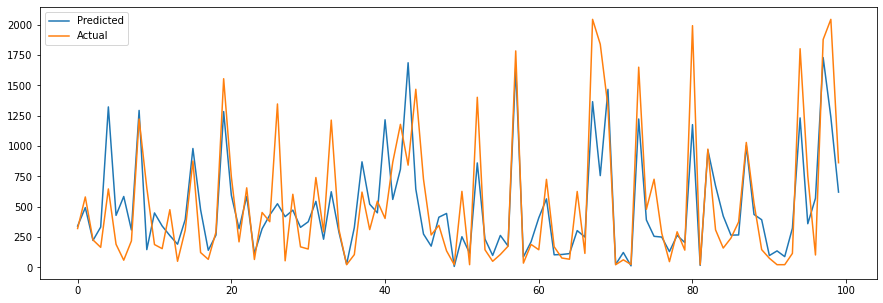

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(10**(y_pred_elastic[:100]))
plt.plot(10**(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

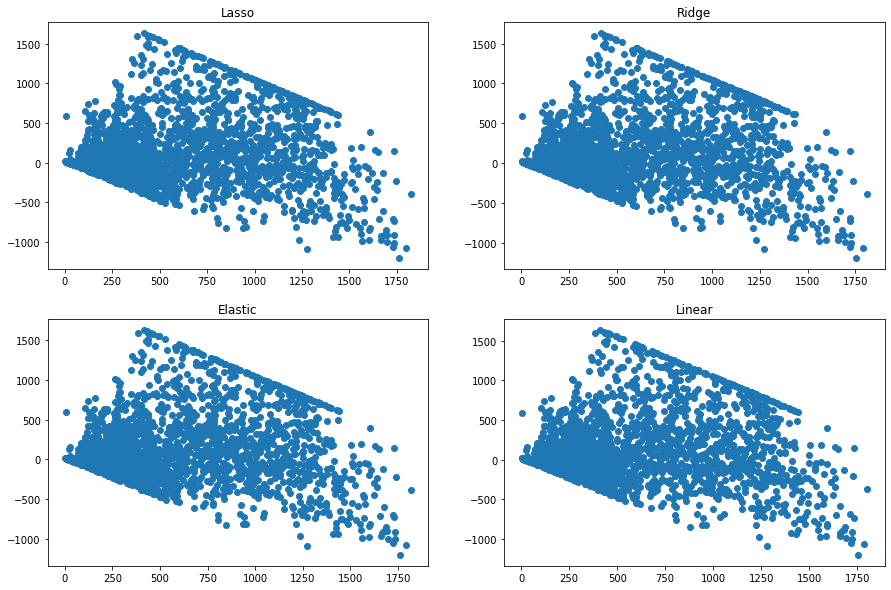

In [ ]:
### Heteroscadacity
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter(10**(y_pred_lasso),(10**(y_test)-10**(y_pred_lasso)))
plt.title('Lasso')
plt.subplot(2,2,2)
plt.scatter(10**(y_pred_ridge),(10**(y_test)-10**(y_pred_ridge)))
plt.title('Ridge')
plt.subplot(2,2,3)
plt.scatter(10**(y_pred_elastic),(10**(y_test)-10**(y_pred_elastic)))
plt.title('Elastic')
plt.subplot(2,2,4)
plt.scatter(10**(y_pred),(10**(y_test)-10**(y_pred)))
plt.title('Linear')
plt.show()

In [ ]:
lr_table = {'Metrics':['Mean Squared Error','Root Mean Squared Error','R2_score','Adjusted R2 score'],"Linear Regression":metric1}
lr_metric = pd.DataFrame(lr_table,columns = ['Metrics','Linear Regression'])
rg_metric = pd.Series(metric3,name = 'Ridge Regression')
ls_metric = pd.Series(metric2,name = 'Lasso Regression')
el_metric = pd.Series(metric4,name = 'ElasticNet Regression')
Final_Evaluation = pd.concat([lr_metric,ls_metric,rg_metric,el_metric],axis = 1)
Final_Evaluation

,Metrics,Linear Regression,Lasso Regression,Ridge Regression,ElasticNet Regression
0,Mean Squared Error,181042.204657,181042.204657,183201.293739,182743.303631
1,Root Mean Squared Error,425.490546,425.490546,428.020202,427.484858
2,R2_score,0.485719,0.485719,0.479585,0.480886
3,Adjusted R2 score,0.482963,0.478286,0.636013,0.478105
